In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [4]:
data = np.arange(-6, 6, 0.1)
data

array([-6.00000000e+00, -5.90000000e+00, -5.80000000e+00, -5.70000000e+00,
       -5.60000000e+00, -5.50000000e+00, -5.40000000e+00, -5.30000000e+00,
       -5.20000000e+00, -5.10000000e+00, -5.00000000e+00, -4.90000000e+00,
       -4.80000000e+00, -4.70000000e+00, -4.60000000e+00, -4.50000000e+00,
       -4.40000000e+00, -4.30000000e+00, -4.20000000e+00, -4.10000000e+00,
       -4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -

In [5]:
log_results = []
for i in data:
    log_results.append(1 / (1 + math.exp(-i)))

log_results = np.array(log_results)
log_results

array([0.00247262, 0.00273196, 0.00301842, 0.00333481, 0.00368424,
       0.00407014, 0.00449627, 0.0049668 , 0.0054863 , 0.0060598 ,
       0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218

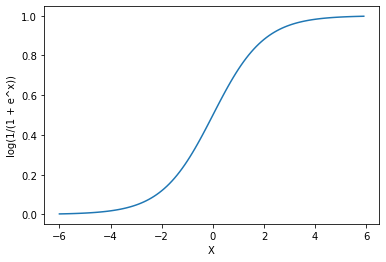

In [6]:
plt.plot(data, log_results, )
plt.xlabel("X")
plt.ylabel("log(1/(1 + e^x))")
plt.show()

In [7]:
df = pd.read_csv('datasets/logistic-regression/bank.csv', sep = ';')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

## Checking Multi-Collinearity

In [10]:
corr = df.corr()
corr

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000

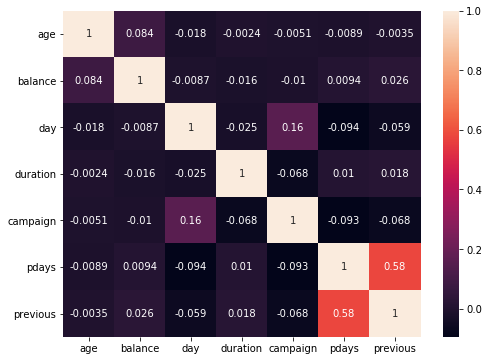

In [11]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True)
plt.show()

In [12]:
# consider the numerical data for calculating Variance Inflation Factor
numeric_cols = df.dtypes[df.dtypes == 'int64'].index

In [13]:
X_num = df[numeric_cols]
X_num.shape

(4521, 7)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()

In [16]:
vif['Features'] = X_num.keys()
vif['VIF'] = [variance_inflation_factor(exog = X_num.values, exog_idx=i) for i in range(len(X_num.keys()))]
vif

Features       VIF
0       age  5.092604
1   balance  1.231819
2       day  4.057535
3  duration  1.928720
4  campaign  1.830360
5     pdays  1.733904
6  previous  1.655651

# Create Dummy Features

In [17]:
df_dum = pd.get_dummies(df, drop_first = True)
df_dum.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   30     1787   19        79         1     -1         0                0   
1   33     4789   11       220         1    339         4                0   
2   35     1350   16       185         1    330         1                0   
3   30     1476    3       199         4     -1         0                0   
4   59        0    5       226         1     -1         0                1   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          1   
2                 0              0  ...          0          0          0   
3                 0              0  ...          1          0          0   
4                 0              0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          1          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  y_yes  
0                 1      0  
1                 0      0  
2                 0      0  
3                 1      0  
4                 1      0  

[5 rows x 43 columns]

In [18]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [19]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

# Feature Engineering

In [24]:
# Splitting data into independent and dependent
X = df_dum.iloc[:, :-1] # independent variable
y = df_dum.iloc[:, -1] # dependent variable

In [25]:
y.value_counts()/len(y)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

**There is clearly unbalance in the dataset**

In [26]:
import statsmodels.api as sm

In [27]:
# Fit the generalized linear model
model = sm.GLM(y, X).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_yes   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4479
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                        0.073097
Method:                          IRLS   Log-Likelihood:                -480.52
Date:                Sat, 29 Feb 2020   Deviance:                       327.40
Time:                        12:02:00   Pearson chi2:                     327.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0005    

In [31]:
X.index

RangeIndex(start=0, stop=4521, step=1)

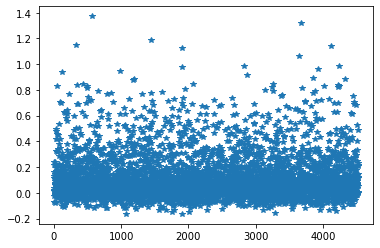

In [32]:
plt.plot(X.index, model.predict(X), '*')

In [33]:
model.pvalues.sort_values(ascending = True)

duration               2.669761e-212
poutcome_success        3.859958e-55
month_oct               1.015051e-11
contact_unknown         1.990262e-08
month_mar               4.873139e-08
month_jan               5.431500e-04
day                     1.601168e-03
month_nov               2.399081e-03
month_jul               2.700422e-03
loan_yes                4.142675e-03
marital_married         6.180763e-03
poutcome_other          8.452288e-03
month_sep               8.965575e-03
job_retired             2.201513e-02
month_jun               7.307536e-02
job_student             7.831682e-02
education_tertiary      7.912248e-02
housing_yes             1.066379e-01
job_unemployed          1.134009e-01
default_yes             1.169212e-01
job_blue-collar         1.463221e-01
month_may               1.478917e-01
month_aug               1.989308e-01
age                     2.052984e-01
month_feb               2.538494e-01
education_unknown       2.705118e-01
campaign                2.852834e-01
m

In [34]:
features = model.pvalues.sort_values(ascending = True)
features[features < 0.025]

duration            2.669761e-212
poutcome_success     3.859958e-55
month_oct            1.015051e-11
contact_unknown      1.990262e-08
month_mar            4.873139e-08
month_jan            5.431500e-04
day                  1.601168e-03
month_nov            2.399081e-03
month_jul            2.700422e-03
loan_yes             4.142675e-03
marital_married      6.180763e-03
poutcome_other       8.452288e-03
month_sep            8.965575e-03
job_retired          2.201513e-02
dtype: float64

In [35]:
selected_features = list(features[features < 0.025].index) + ['y_yes']
print(selected_features)

['duration', 'poutcome_success', 'month_oct', 'contact_unknown', 'month_mar', 'month_jan', 'day', 'month_nov', 'month_jul', 'loan_yes', 'marital_married', 'poutcome_other', 'month_sep', 'job_retired', 'y_yes']


In [36]:
features_data = df_dum[selected_features]
features_data.head()

duration  poutcome_success  month_oct  contact_unknown  month_mar  \
0        79                 0          1                0          0   
1       220                 0          0                0          0   
2       185                 0          0                0          0   
3       199                 0          0                1          0   
4       226                 0          0                1          0   

   month_jan  day  month_nov  month_jul  loan_yes  marital_married  \
0          0   19          0          0         0                1   
1          0   11          0          0         1                1   
2          0   16          0          0         0                0   
3          0    3          0          0         1                1   
4          0    5          0          0         0                1   

   poutcome_other  month_sep  job_retired  y_yes  
0               0          0            0      0  
1               0          0            0      0  
2               0          0            0      0  
3               0          0            0      0  
4               0          0            0      0

In [37]:
# save the final data to csv
features_data.to_csv('datasets/logistic-regression/bank_selected_features.csv', index = False)

In [38]:
features_data.head()

duration  poutcome_success  month_oct  contact_unknown  month_mar  \
0        79                 0          1                0          0   
1       220                 0          0                0          0   
2       185                 0          0                0          0   
3       199                 0          0                1          0   
4       226                 0          0                1          0   

   month_jan  day  month_nov  month_jul  loan_yes  marital_married  \
0          0   19          0          0         0                1   
1          0   11          0          0         1                1   
2          0   16          0          0         0                0   
3          0    3          0          0         1                1   
4          0    5          0          0         0                1   

   poutcome_other  month_sep  job_retired  y_yes  
0               0          0            0      0  
1               0          0            0      0  
2               0          0            0      0  
3               0          0            0      0  
4               0          0            0      0